In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Logistic Regression with Python

BMI predictor based on BMI data 

Body Mass Index is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. BMI applies to most adults 18-65 years.

This is a simplification and generalisation and is often not a good indicator of a individual person health, as every person is slightly different.

In [2]:
df = pd.read_csv(r'bmi.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.7+ KB


In [4]:
df.shape

(500, 4)

In [5]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
df.isnull().sum() #check for  null values

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,Gender,Height,Weight,Index
3,Female,195,104,3
8,Male,174,90,3
72,Male,141,80,5
138,Male,171,147,5
141,Female,167,85,4
156,Female,182,84,3
181,Male,177,117,4
187,Female,182,84,3
217,Female,142,86,5
242,Male,191,62,1


In [8]:
# assuming that these people are the same (Not necessarily true - could be different people with same stats)
for index in df[df.duplicated()].index:
    df.drop(index, inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

## EDA

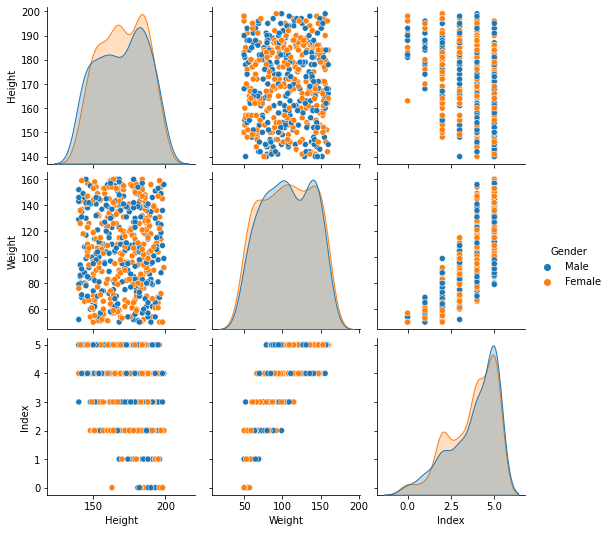

In [10]:
sns.pairplot(df, hue='Gender')

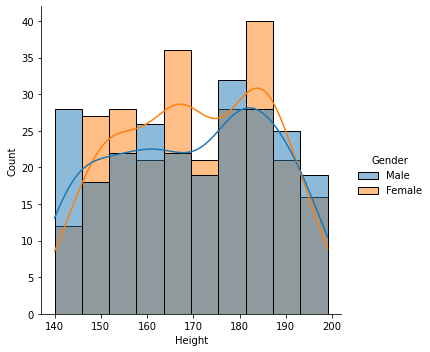

In [11]:
sns.displot(x= 'Height', data=df, hue='Gender', kde=True)

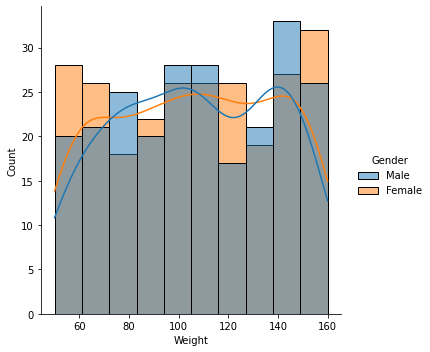

In [12]:
sns.displot(x= 'Weight', data=df, hue='Gender', kde=True)

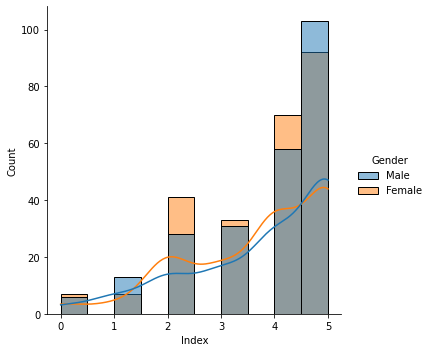

In [13]:
sns.displot(x= 'Index', data=df, hue='Gender', kde=True)

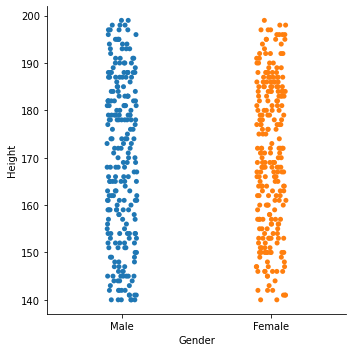

In [14]:
sns.catplot(x='Gender', y='Height',data=df)

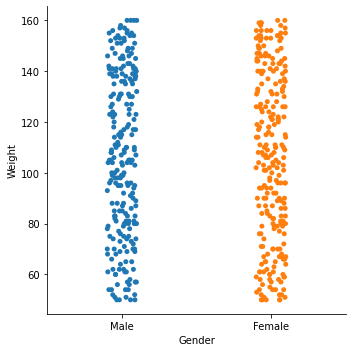

In [15]:
sns.catplot(x='Gender', y='Weight',data=df)

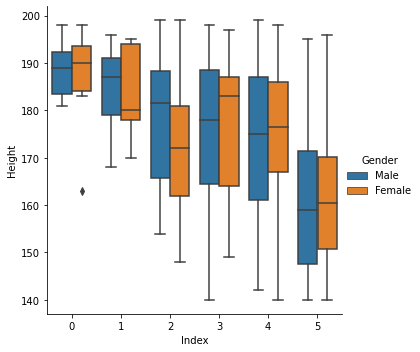

In [16]:
sns.catplot(x='Index', y='Height',data=df, hue='Gender', kind='box')

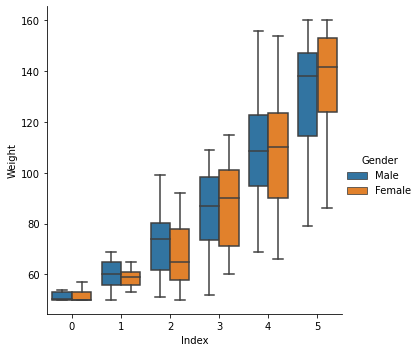

In [17]:
sns.catplot(x='Index', y='Weight',data=df, hue='Gender', kind='box')

<AxesSubplot:xlabel='Index', ylabel='Weight'>

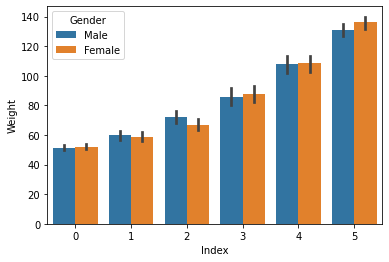

In [18]:
sns.barplot(x='Index', y='Weight', data=df, hue='Gender')

<AxesSubplot:xlabel='Index', ylabel='Height'>

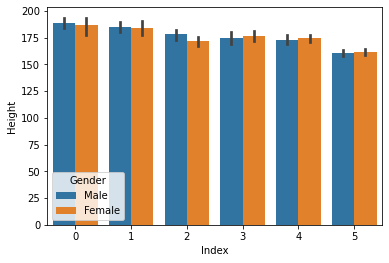

In [19]:
sns.barplot(x='Index', y='Height', data=df, hue='Gender')

<AxesSubplot:xlabel='Index', ylabel='count'>

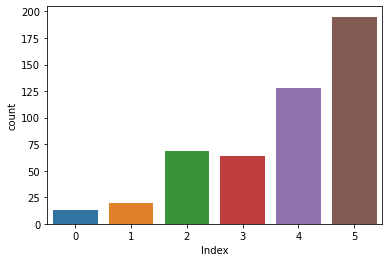

In [20]:
sns.countplot(x='Index', data=df)

## Feature Engineering

In [21]:
# map to 2 categories overweight and underweight 0 to 2 not overweight 3-5 as overweight

df['Index'] = df['Index'].map({0:0, 1:0, 2:0,
                              3:1, 4:1, 5:1})

In [22]:
gender = pd.get_dummies(df['Gender'], drop_first =True) #ismale 0-1

In [25]:
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [23]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,1
4,Male,149,61,1


In [26]:
df=pd.concat([df, gender], axis=1)
df.drop(columns=['Gender'], inplace=True)

In [27]:
df.head()

,Height,Weight,Index,Male
0,174,96,1,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,1,1


## Modelling and training

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
df['Index'].value_counts(normalize=True)

1    0.791411
0    0.208589
Name: Index, dtype: float64

<AxesSubplot:ylabel='Index'>

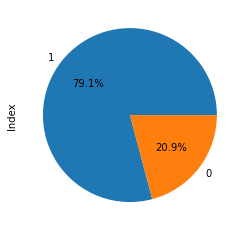

In [50]:
df['Index'].value_counts().plot.pie(autopct='%1.1f%%')

it is an imbalanced dataset

In [33]:
# Train Test split

X = df[['Male', 'Weight', 'Height']]
y=df['Index']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [37]:
log.score(X_train, y_train) # accuracy metric

0.9694189602446484

In [36]:
log.score(X_test, y_test) # accuracy metric

0.9814814814814815

In [38]:
# TODOs:

# cross validation
# try different parameters and tuning l1, l2, elastic net etc.
# balance the classes before training and try again

## Interpretations and Predictions

In [39]:
pd.DataFrame(log.coef_[0], index=X.columns)

,0
Male,0.465441
Weight,0.309205
Height,-0.260087


In [40]:
# coefficients of our model, influencing y

In [43]:
log.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

## Evaluation


In [54]:
# Evaluation
from sklearn.metrics import (classification_report, confusion_matrix, plot_roc_curve, 
recall_score, precision_score, f1_score, accuracy_score)

from sklearn.model_selection import cross_val_score

In [62]:
# test with cross validation on train dataset
print('f1',cross_val_score(estimator = log, X=X_train , y=y_train, cv=10, scoring ='f1').mean(),'\n',
'acc', cross_val_score(estimator = log, X=X_train , y=y_train, cv=10, scoring ='accuracy').mean(),'\n',
'precision', cross_val_score(estimator = log, X=X_train, y=y_train, cv=10, scoring='precision').mean(),'\n',
      'recall', cross_val_score(estimator=log, X=X_train, y=y_train, cv=10, scoring='recall').mean(), '\n', 
     )

f1 0.9770585648166114 
 acc 0.9634469696969697 
 precision 0.9814713064713064 
 recall 0.9736467236467237 



In [45]:
predictions = log.predict(X_test) # predictions on test dataset

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.98      0.99       123

    accuracy                           0.98       162
   macro avg       0.96      0.99      0.98       162
weighted avg       0.98      0.98      0.98       162



<AxesSubplot:>

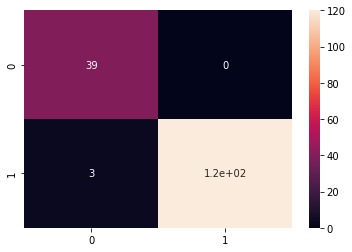

In [48]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

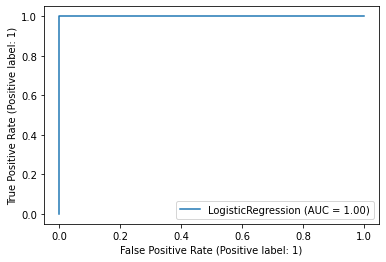

In [49]:
plot_roc_curve(log, X_test, y_test)